# Load the EduGradeData file and make the following visualizations:
- A histogram that shows average hours of study by letter grade
- A histogram that shows average hours of exercise by letter grade
- A series of boxplots to show the distribution of grades across genders
- A histogram that show the relative amounts of A's, B's, and C's


In [1]:
### typical libraries

import pandas as pd
import numpy as np

In [2]:
### matplotlib.pyplot is a 2D plotting library that creates high-quality figures

from matplotlib import pyplot as plt

### this command allows you to view your plots in the notebook

%matplotlib inline

In [3]:
### seaborn is complimentary to matplotlib and allows for further plot customization 
### seaborn visualization is REALLY good

import seaborn as sns

In [4]:
edu = pd.read_csv("EduGradeData.csv")

In [5]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fname           2000 non-null   object 
 1   lname           2000 non-null   object 
 2   gender          2000 non-null   object 
 3   age             2000 non-null   int64  
 4   exercise        2000 non-null   int64  
 5   level_of_fit    2000 non-null   object 
 6   hours           2000 non-null   int64  
 7   level_of_study  1997 non-null   object 
 8   grade           2000 non-null   float64
 9   home_state      2000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 156.4+ KB


In [6]:
edu.head()

,fname,lname,gender,age,exercise,level_of_fit,hours,level_of_study,grade,home_state
0,Marcia,Pugh,female,17,3,low,10,moderate,82.4,NJ
1,Kadeem,Morrison,male,18,4,low,4,low,78.2,MA
2,Nash,Powell,male,18,5,low,9,moderate,79.3,OH
3,Noelani,Wagner,female,14,2,high,7,moderate,83.2,FL
4,Noelani,Cherry,female,18,4,low,15,high,87.4,OH


In [10]:
### Convert number grades into letter grades

# 0 - 60 = F
# 60.1 - 70 = D
# 70.1 - 80 = C
# 80.1 - 90 = B
# 90.1 - 100+ = A

#### STEP 1: create the bin limits ####

bins = [0, 60, 70, 80, 90, 150]

## the bin limits are the cutoff points for the values
## each number shown is the cutoff for a specific group (0-60, 60.1 - 70, 70.1 - 80...)

bin_labels = ["F", "D", "C", "B", "A"]

## the bin labels are the group names that will be created
## there should always be one less group than bins

#### STEP 2: apply your bins to a specific column (or create new column) in dataset  ####
## new column = pd.cut(column to apply to, bin cutoff list, labels = list of bin labels)
# pd.cut function segments and organizes values into the appropriate bin

edu["Letter Grade"] = pd.cut(edu["grade"], bins, labels = bin_labels)

#### STEP 3: check changes  ####

edu

,fname,lname,gender,age,exercise,level_of_fit,hours,level_of_study,grade,home_state,Letter Grades,Letter Grade
0,Marcia,Pugh,female,17,3,low,10,moderate,82.4,NJ,B,B
1,Kadeem,Morrison,male,18,4,low,4,low,78.2,MA,C,C
2,Nash,Powell,male,18,5,low,9,moderate,79.3,OH,C,C
3,Noelani,Wagner,female,14,2,high,7,moderate,83.2,FL,B,B
4,Noelani,Cherry,female,18,4,low,15,high,87.4,OH,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Cody,Shepherd,male,19,1,high,8,moderate,80.1,VA,B,B
1996,Geraldine,Peterson,female,16,4,low,18,high,100.0,NY,A,A
1997,Mercedes,Leon,female,18,3,low,14,high,84.9,UT,B,B
1998,Lucius,Rowland,male,16,1,high,7,moderate,69.1,MT,D,D


In [34]:
edu.drop(columns = "Letter Grades", inplace = True)

edu.head()

,fname,lname,gender,age,exercise,level_of_fit,hours,level_of_study,grade,home_state,Letter Grade
0,Marcia,Pugh,female,17,3,low,10,moderate,82.4,NJ,B
1,Kadeem,Morrison,male,18,4,low,4,low,78.2,MA,C
2,Nash,Powell,male,18,5,low,9,moderate,79.3,OH,C
3,Noelani,Wagner,female,14,2,high,7,moderate,83.2,FL,B
4,Noelani,Cherry,female,18,4,low,15,high,87.4,OH,B


In [12]:
## Calculate average hours of study by letter grade

edu["hours"].groupby(edu["Letter Grade"]).mean()

Letter Grade
F     3.933333
D     5.544041
C     8.381034
B    11.827680
A    15.305263
Name: hours, dtype: float64

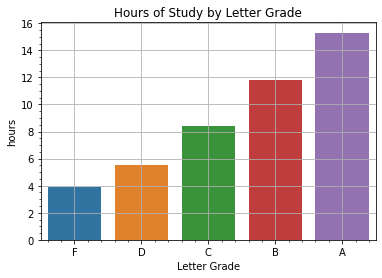

In [15]:
### Barplot showing the average hours of study by letter grade

sns.barplot(data = edu, x = "Letter Grade", y = "hours", ci = None)

plt.title('Hours of Study by Letter Grade')
plt.grid()
plt.minorticks_on() 

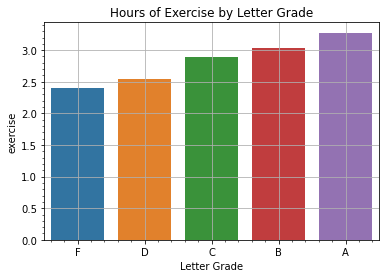

In [16]:
### Barplot showing the average hours of exercise by letter grade

sns.barplot(data = edu, x = "Letter Grade", y = "exercise", ci = None)

plt.title('Hours of Exercise by Letter Grade')
plt.grid()
plt.minorticks_on() 

<AxesSubplot:xlabel='gender', ylabel='grade'>

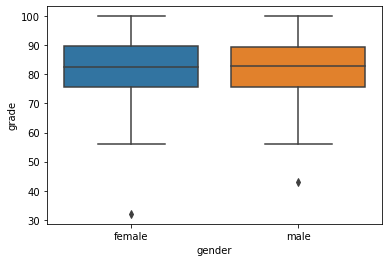

In [18]:
## A series of boxplots to show the distribution of grades across genders

sns.boxplot(x = edu["gender"], y = edu["grade"])

<AxesSubplot:xlabel='Letter Grade', ylabel='Count'>

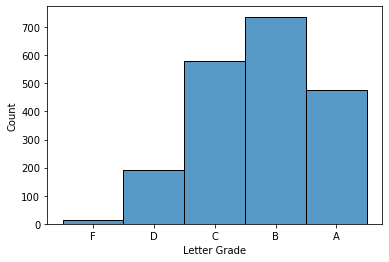

In [19]:
## A histogram that show the relative amounts of A's, B's, and C's

sns.histplot(edu["Letter Grade"], kde = False)

<AxesSubplot:xlabel='Letter Grade', ylabel='hours'>

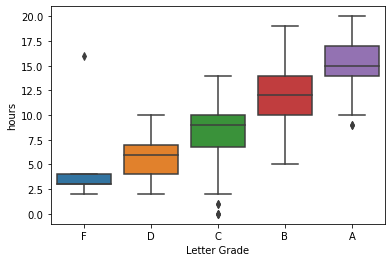

In [20]:
## Boxplot for hours of study by letter grade

sns.boxplot(x = edu["Letter Grade"], y = edu["hours"])

<AxesSubplot:xlabel='Letter Grade', ylabel='hours'>

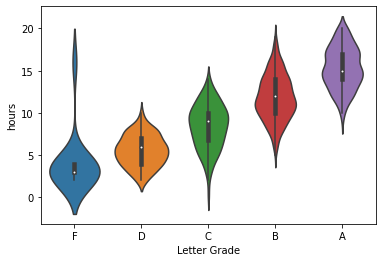

In [21]:
## Violin plot to show distribution of hours of study by letter grade

sns.violinplot(x = edu["Letter Grade"], y = edu["hours"])

<AxesSubplot:xlabel='grade', ylabel='Density'>

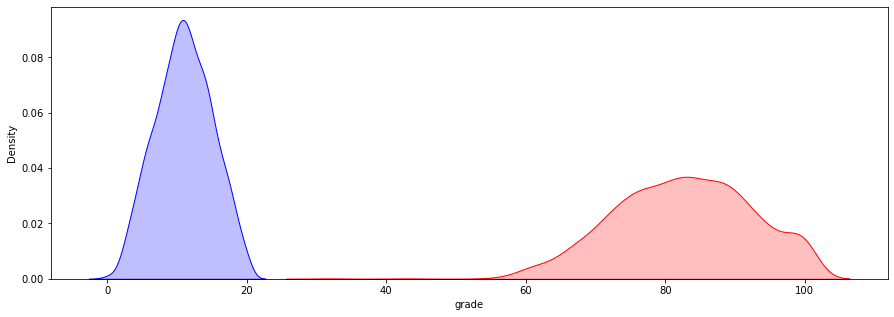

In [33]:
### plotting overlayed density plots for letter grade and  hours of study
### doesn't make sense because the numbers aren't on the same scale

plt.figure(figsize=(15,5)) ## change the figure size

sns.kdeplot(edu['grade'], shade = True, color = "red", label = "Grade")
sns.kdeplot(edu['hours'], shade = True, color = "blue", label = "Hours of Study")

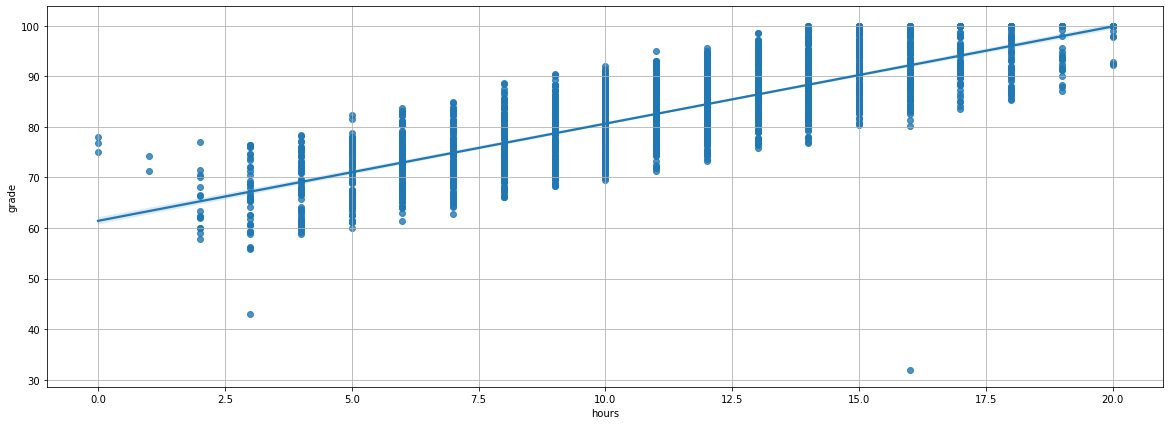

In [31]:
## Scatterplot showing grades vs. hours, with regression line

plt.figure(figsize=(20,7))

sns.regplot(x = edu["hours"], y = edu["grade"], fit_reg = True)

plt.grid()